# 1. 라이브러리 & 폰트 설정 

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (12, 9)

In [4]:
pd.set_option('display.max_rows', None)

# 2. 파일 업로드 & 데이터 전처리

In [5]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1kJwY2WWf8Oq1RKd_w6lZ7D3jofJLdZYB', encoding='cp949')

In [6]:
df = df.set_index('지역')
df = df.transpose()
df.head()

지역,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,서울 강북지역,서울 도심권,...,경남 진주시,경남 통영시,경남 사천시,경남 김해시,경남 밀양시,경남 거제시,경남 양산시,제주,제주 제주시,제주 서귀포시
12.Jan,264474.0,365249.0,163394.0,195186.0,190421.0,211371.0,139237.0,540954.0,405962.0,706316.0,...,157468.0,143155.0,101292.0,172711.0,105897.0,181049.0,130287.0,134994.0,145425.0,80868.0
12.Feb,264035.0,364275.0,163491.0,194989.0,190312.0,211340.0,139518.0,538876.0,405406.0,705830.0,...,157582.0,143155.0,101292.0,171124.0,105897.0,181585.0,130202.0,139424.0,150436.0,82283.0
12.Mar,263470.0,362790.0,163849.0,195093.0,190555.0,211142.0,139979.0,536079.0,404184.0,702286.0,...,159802.0,143507.0,101519.0,169589.0,105897.0,182488.0,129489.0,139830.0,150769.0,83067.0
12.Apr,262630.0,360918.0,164044.0,195037.0,190603.0,210804.0,140306.0,532409.0,402746.0,701482.0,...,159814.0,143162.0,101519.0,168874.0,105971.0,183663.0,128351.0,141365.0,152481.0,83683.0
12.May,261823.0,359253.0,164096.0,194851.0,190631.0,210270.0,140378.0,529733.0,401085.0,700462.0,...,159700.0,143207.0,101519.0,168084.0,105971.0,183272.0,127287.0,144561.0,155972.0,85350.0


# 3. 시각화(Geopandas 형식)
3-1) 라이브러리 설치 및 데이터 전처리


In [7]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import geopandas as gpd
from geopandas import GeoDataFrame

In [9]:
#데이터 불러오기

G_shp = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/41000/TL_KODIS_BAS.shp", encoding = 'cp949')
G_dbf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/41000/TL_KODIS_BAS.dbf", encoding = 'cp949')
G_shx = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/41000/TL_KODIS_BAS.shx", encoding = 'cp949')

In [10]:
#shp 데이터 확인

G_shp.head()

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry
0,0.616,16293,4111000477,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((957792.821 1923248.053, 957773.566 1..."
1,0.747,16290,4111000478,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((958316.161 1922421.038, 958294.114 1..."
2,0.373,16278,4111000460,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((957873.608 1922388.788, 957869.303 1..."
3,0.188,16297,4111000479,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((956403.226 1923654.735, 956394.744 1..."
4,0.053,16214,4111000419,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((958316.161 1922421.038, 958317.137 1..."


In [11]:
#shp 데이터 구별 코드로 grouping

G_shp = G_shp.dissolve(by='SIG_CD')
G_shp = pd.DataFrame(G_shp)
G_shp

,geometry,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_KOR_NM
SIG_CD,,,,,,,,,,
41110,"POLYGON ((952822.086 1915195.970, 952815.247 1...",0.616000,16293,4111000477,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,수원시
41130,"POLYGON ((964566.868 1927175.067, 964576.858 1...",0.134138,13113,4113000340,경기도,20161027,행정구역 변경에 의한 기초구역 변경,20161027,20161027000000,성남시
41150,"POLYGON ((959943.040 1965966.943, 959911.887 1...",1.171000,11814,4115000213,경기도,20151007,기초구역 경계 변경에 의한 기초구역 변경,20151007,20151007000000,의정부시
41170,"POLYGON ((948443.477 1931013.277, 948414.863 1...",0.066711,14064,4117000056,경기도,None,None,20121221,None,안양시
41190,"POLYGON ((934763.381 1942123.160, 934731.663 1...",0.085490,14724,4119000214,경기도,None,None,20121221,None,부천시
41210,"POLYGON ((942685.506 1934573.612, 942677.017 1...",0.133874,14271,4121000087,경기도,None,None,20121221,None,광명시
41220,"POLYGON ((947410.007 1878304.477, 947410.019 1...",3.878000,17706,4122000005,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,평택시
41250,"POLYGON ((960412.900 1986940.571, 960398.997 1...",11.573475,11360,4125000022,경기도,None,None,20121221,None,동두천시
41270,"MULTIPOLYGON (((907991.824 1898612.004, 907982...",0.097000,15532,4127000077,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,안산시


In [19]:
#필요한 column만 추출 후 head 확인

G_shp = G_shp[['SIG_KOR_NM', 'geometry']]
G_shp.head()

,SIG_KOR_NM,geometry
0,수원시,"POLYGON ((952822.086 1915195.970, 952815.247 1..."
1,성남시,"POLYGON ((964566.868 1927175.067, 964576.858 1..."
2,의정부시,"POLYGON ((959943.040 1965966.943, 959911.887 1..."
3,안양시,"POLYGON ((948443.477 1931013.277, 948414.863 1..."
4,부천시,"POLYGON ((934763.381 1942123.160, 934731.663 1..."


In [13]:
#df_G 데이터에서 불필요한 columns 삭제

df_G = df.iloc[-1:,42:93]

print(df_G.head())
print(df_G.columns)

df_G.drop(columns = ['경기 만안구', '경기 동안구', '경기 수정구', '경기 중원구', '경기 분당구', '경기 경부2권', 
                     '경기 처인구', '경기 기흥구', '경기 수지구', '경기 장안구', '경기 권선구', '경기 팔달구',
                     '경기 영통구', '경기 서해안권',
                     '경기 상록구', '경기 단원구', '경기 동부1권', '경기 동부2권', '경기 경의권', '경기 덕양구', 
                     '경기 일산동구', '경기 일산서구', '경기 경원권'], inplace=True)

지역         경기 과천시    경기 안양시    경기 만안구    경기 동안구    경기 성남시    경기 수정구    경기 중원구  \
21.Jun  1368271.0  662823.0  550469.0  720886.0  944644.0  999452.0  501853.0   

지역         경기 분당구    경기 군포시    경기 의왕시  ...    경기 여주시    경기 경의권    경기 김포시  \
21.Jun  1030865.0  470143.0  637225.0  ...  134433.0  418947.0  408153.0   

지역        경기 고양시    경기 덕양구   경기 일산동구   경기 일산서구    경기 파주시    경기 경원권    경기 포천시  
21.Jun  458478.0  487441.0  506343.0  395563.0  324538.0  261150.0  147071.0  

[1 rows x 51 columns]
Index(['경기 과천시', '경기 안양시', '경기 만안구', '경기 동안구', '경기 성남시', '경기 수정구', '경기 중원구',
       '경기 분당구', '경기 군포시', '경기 의왕시', '경기 경부2권', '경기 안성시', '경기 용인시', '경기 처인구',
       '경기 기흥구', '경기 수지구', '경기 수원시', '경기 장안구', '경기 권선구', '경기 팔달구', '경기 영통구',
       '경기 서해안권', '경기 부천시', '경기 (구)원미구', '경기 (구)소사구', '경기 (구)오정구', '경기 안산시',
       '경기 상록구', '경기 단원구', '경기 시흥시', '경기 광명시', '경기 화성시', '경기 오산시', '경기 평택시',
       '경기 동부1권', '경기 남양주시', '경기 구리시', '경기 하남시', '경기 광주시', '경기 동부2권', '경기 이천시',
       '경기 여주시', '경기 경의권', '경기 김포시', 

In [14]:
#잘 삭제되었는지 확인

df_G.columns.nunique()

28

In [15]:
#df_G 데이터 transpose 후 head 확인

df_G = pd.DataFrame(df_G.transpose())
df_G.head()

,21.Jun
지역,
경기 과천시,1368271.0
경기 안양시,662823.0
경기 성남시,944644.0
경기 군포시,470143.0
경기 의왕시,637225.0


In [16]:
#G_shp와 df_G 데이터 index 재설정 후 concat

G_shp.reset_index(inplace=True)
df_G.reset_index(inplace=True)

G_graph = pd.concat([df_G, G_shp], axis=1)
G_graph.head()

,지역,21.Jun,SIG_CD,SIG_KOR_NM,geometry
0,경기 과천시,1368271.0,41110,수원시,"POLYGON ((952822.086 1915195.970, 952815.247 1..."
1,경기 안양시,662823.0,41130,성남시,"POLYGON ((964566.868 1927175.067, 964576.858 1..."
2,경기 성남시,944644.0,41150,의정부시,"POLYGON ((959943.040 1965966.943, 959911.887 1..."
3,경기 군포시,470143.0,41170,안양시,"POLYGON ((948443.477 1931013.277, 948414.863 1..."
4,경기 의왕시,637225.0,41190,부천시,"POLYGON ((934763.381 1942123.160, 934731.663 1..."


In [17]:
#그래프 시각화 위한 column 이름 변경

G_graph.columns = ['지역','value','구별 코드','구 명칭','geometry']
G_graph.columns

G = GeoDataFrame(G_graph)
G.head()

,지역,value,구별 코드,구 명칭,geometry
0,경기 과천시,1368271.0,41110,수원시,"POLYGON ((952822.086 1915195.970, 952815.247 1..."
1,경기 안양시,662823.0,41130,성남시,"POLYGON ((964566.868 1927175.067, 964576.858 1..."
2,경기 성남시,944644.0,41150,의정부시,"POLYGON ((959943.040 1965966.943, 959911.887 1..."
3,경기 군포시,470143.0,41170,안양시,"POLYGON ((948443.477 1931013.277, 948414.863 1..."
4,경기 의왕시,637225.0,41190,부천시,"POLYGON ((934763.381 1942123.160, 934731.663 1..."


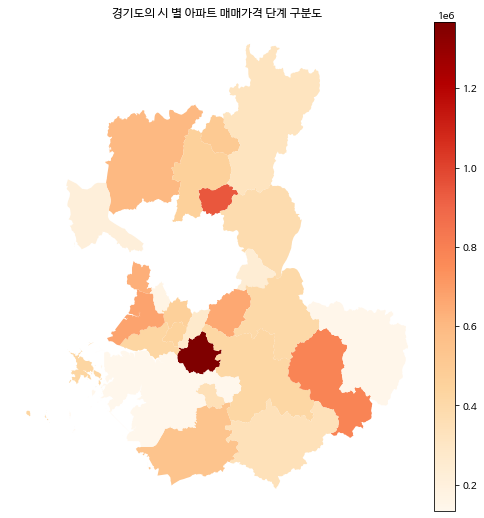

In [18]:
#geopandas 단계 구분도 시각화

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)
plt.rcParams["figure.figsize"] = (20,10)
G.geometry = G.buffer(0.001)

#범례
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)

#시각화
G.plot(column='value', ax=ax,legend=True, cax=cax, cmap="OrRd")
ax.set_title("경기도의 시 별 아파트 매매가격 단계 구분도")
ax.set_axis_off()
plt.show()

# **한계**
가평군, 연천군, 또 뭐 하나 데이터 가 없어 시각화를 정확히 나타내지 못함

